# Plot computational performance results
- This script is used to plot computational performance results under different configuration.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
model_list = ['wrf', 'wrf-ctsm', 'wrf-ctsm_1pft', 'wrf-ctsm_1pft1urban']
cpus_list = [1, 2, 4, 6]
df_timing = pd.read_csv('data_for_figure/timing.csv')
df_timing_computation = df_timing[['elapsed_seconds', 'cpus', 'model']].groupby(['model', 'cpus']).sum().reset_index()
df_timing_computation['elapsed_mitutes'] = df_timing_computation['elapsed_seconds'] / 60
df_timing_computation

,model,cpus,elapsed_seconds,elapsed_mitutes
0,wrf,1,1003.94009,16.732335
1,wrf,2,966.33198,16.105533
2,wrf,4,958.22452,15.970409
3,wrf,6,958.31465,15.971911
4,wrf-ctsm,1,2313.32433,38.555405
5,wrf-ctsm,2,2303.51416,38.391903
6,wrf-ctsm,4,2223.05059,37.050843
7,wrf-ctsm,6,2233.09053,37.218176
8,wrf-ctsm_1pft,1,2105.45461,35.090910
9,wrf-ctsm_1pft,2,2008.11051,33.468508


In [3]:
df_timing_computation['total_execution_time'] = [17+8/60, 16+15/60, 16+6/60, 16+ 8/60, 
                                                 38+46/60, 39+6/60, 37+21/60, 37+27/60,
                                                 35+38/60, 33+41/60, 33+30/60, 34+25/60,
                                                 31+21/60, 31+17/60, 30+30/60, 30+54/60]
df_timing_computation['io'] = (df_timing_computation['total_execution_time'] - df_timing_computation['elapsed_mitutes'])*60
df_timing_computation.set_index('model', inplace=True)
df_timing_computation['speedup-ratio'] = df_timing_computation.groupby(df_timing_computation.index)['total_execution_time']\
    .transform(lambda x: x.iloc[0]/ x)
df_timing_computation.reset_index(inplace=True)
df_timing_computation

,model,cpus,elapsed_seconds,elapsed_mitutes,total_execution_time,io,speedup-ratio
0,wrf,1,1003.94009,16.732335,17.133333,24.05991,1.000000
1,wrf,2,966.33198,16.105533,16.250000,8.66802,1.054359
2,wrf,4,958.22452,15.970409,16.100000,7.77548,1.064182
3,wrf,6,958.31465,15.971911,16.133333,9.68535,1.061983
4,wrf-ctsm,1,2313.32433,38.555405,38.766667,12.67567,1.000000
5,wrf-ctsm,2,2303.51416,38.391903,39.100000,42.48584,0.991475
6,wrf-ctsm,4,2223.05059,37.050843,37.350000,17.94941,1.037929
7,wrf-ctsm,6,2233.09053,37.218176,37.450000,13.90947,1.035158
8,wrf-ctsm_1pft,1,2105.45461,35.090910,35.633333,32.54539,1.000000
9,wrf-ctsm_1pft,2,2008.11051,33.468508,33.683333,12.88949,1.057892


In [4]:
linewidth = 0.5
lc1 = '#1b9e77'
lc2 = '#d95f02'
lc_list = [lc1, lc2, lc2, lc2]
labelcolor = '#6b6b6b'
fontsize = 6
boundarywidth = 0.5
labelsize = 6
tick_length = 2
ticklabel_pad = 0.1
ylabel_list = ['minutes', '', 'minutes', 'seconds']
title_list = ['(a) Total execution time', '(b) Speed-up ratio', '(c) Total computation time', '(d) Residual time']
label_list = ['GM_SLUCM', 'GM_CLMU with 15 PFTs and 3 urban types', 'GM_CLMU with 1 PFT and 3 urban types', 
              'GM_CLMU with 1 PFT and 1 urban type']
linestyle_list = ['-', '-', '--', ':']
padding = 4
marksersize = 2
handletextpad = 0.5
ymin_list = [15, 0.9, 15, 5 ]
ymax_list = [40, 1.1, 40, 45]

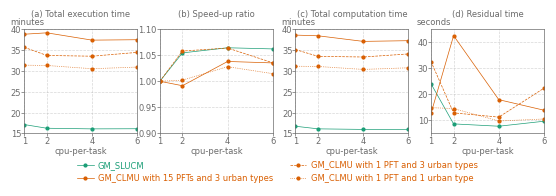

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(5.5, 1.8))
ax = axes.flatten()

for i in range(4):
    var = ['total_execution_time', 'speedup-ratio', 'elapsed_mitutes','io' ][i]
    for m, model in enumerate(model_list):
        df_timing_computation_model = df_timing_computation[df_timing_computation['model'] == model]
        ax[i].plot(df_timing_computation_model['cpus'].values, df_timing_computation_model[var].values,
                   marker='o', markersize=marksersize, linewidth=linewidth, linestyle=linestyle_list[m],
                   color = lc_list[m], label=label_list[m])
    ax[i].set_xlim(1, 6)
    ax[i].set_xticks([1, 2, 4, 6])
    ax[i].set_ylim(ymin_list[i], ymax_list[i])
    ax[i].tick_params(axis='y', labelleft = True, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)    
    ax[i].tick_params(axis='x', labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)
    ax[i].set_xlabel('cpu-per-task', fontsize=fontsize, color=labelcolor, labelpad=0.5)
    ax[i].set_title(title_list[i], fontsize=fontsize, color=labelcolor, pad=padding*2.25)
    ax[i].set_ylabel(ylabel_list[i], fontsize=fontsize, color=labelcolor, rotation=0, ha='center')
    ax[i].yaxis.set_label_coords(0.025, 1.0195) 
    ax[i].grid(True,linestyle='--',linewidth=linewidth, alpha=0.5)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor) 
lines, labels = ax[1].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=fontsize, ncol=2)
for i, text in enumerate(legend.get_texts()):
    text.set_color(lc_list[i])
plt.subplots_adjust(left=0.04, right=0.985, bottom=0.3, top=0.88, wspace=0.2, hspace= 0.3)   
fig.savefig('computation_time.png', dpi=300) 
fig.savefig('computation_time.pdf', dpi=600) 